# Notebook for Statistical Tests 

In this script, several statistical tests are implemented in order for investigating different kinds of scenarios in a self-adaptation in largescale software-intensive distributed systems we wanted to investigate. The main problem in making such systems self-adaptive is that their adaptation needs to consider the current situation in the whole system. We want to make this adaptation based on statistical test results based on a cost parameter.

As an example, consider a city traffic management system, which collects data from many sources like cars or traffic lights and then optimizes the traffic guidance. For this system, our vaiable of the interest is `overhead`(Average of trip overheads), which is defined as the actual duration of a trip versus the theoretical case where routing is performed based only on static map data—length and maximum speed of each street. Ideally, this should be 1.

So far we have following processes implemented:
    * Boxplot for the response of different experiments
    * Investigation of overhead distribution
    * Comparing the different experiments response statistically
    * Sample Size and Similarity Tes
    * TODO : Finding the underlying distributions(most probably k=2 factors)

In [41]:
# Import necessary packages
%matplotlib inline
import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools
import math
from statsmodels.stats import power


# change the directory of the script manually to the interested experiment's folder 
os.chdir("../saved_experiments/exp2")

OSError: [Errno 2] No such file or directory: '../saved_experiments/exp2'

In [42]:
'''
Read the .csv file for given interval of the experiments
@start_index int 
@end_index   int
'''
def load_file(start_index, end_index):
    df_list = []
    for i in range(start_index, end_index+1):
        name_of_file = "exp"+str(i)+".txt"
        column_name = "overhead"+str(i)
        df_temp = pd.read_csv(name_of_file)["overhead"].to_frame()
        df_temp.columns.values[0] = column_name
        df_list.append(df_temp)
    df = pd.concat(df_list, axis=1)
    df.to_csv(path_or_buf="combined.csv", index= False)
    del df_list
    
    return df
df = load_file(1, 20)

In [43]:
df.head()
length = df.shape[0]
print length

10000


## Boxplots of the given column

One can find specifications about boxplot in [this link](http://www.physics.csbsju.edu/stats/box2.html)

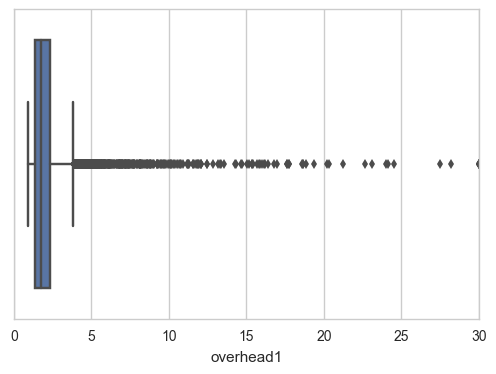

In [44]:
ax = sns.boxplot(x="overhead1", data= df)

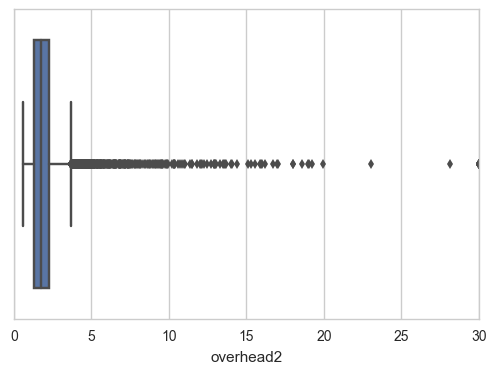

In [45]:
ax = sns.boxplot(x="overhead2", data= df)

## Investigation of overhead distribution
In this section, I simulated observed distribution of parameter of interest for all experiments in an experiment folder.It is clear that distribution of `log(data)` and `gamma` distribution seems quite similar. I used `log(data)` because it has really high values for small overhead and I needed to scale the data so that I can fit appropriate distribution. 

After plotting all experiments, I used one of them to see how close it is to the `gamma` distribution by firs fitting the gamma distribution to the observed overhead and then I used estimated parameters and fitted `gamma` distribution for Q-Q plot. 

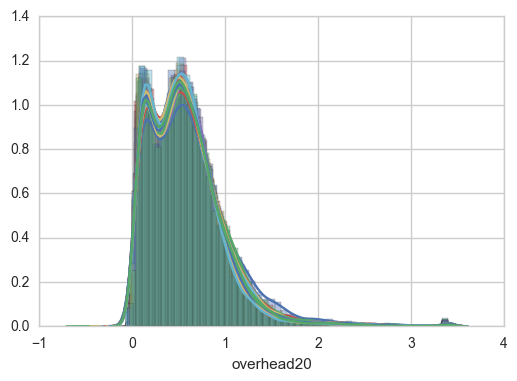

In [46]:
for x in df.columns.values:
    sns.distplot(np.log(df[x]));


### Fit a distribution to observed data

Probability distribution fitting or simply distribution fitting is the fitting of a probability distribution to a series of data concerning the repeated measurement of a variable phenomenon.

The aim of distribution fitting is to predict the probability or to forecast the frequency of occurrence of the magnitude of the phenomenon in a certain interval. Basically our main gole here is to select a distribution that suits the data well.

#### Maximum Likehood Estimation (MLE)
We are going to use Maximum Likehood Estimation (MLE) to fit a selected distribution, in our case `gamma`. 
In statistics, maximum likelihood estimation (MLE) is defined as a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters.
To use the method of maximum likelihood,[7] one first specifies the joint density function for all observations. For an independent and identically distributed sample, this joint density function is

${\displaystyle f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=f(x_{1}\mid \theta )\times f(x_{2}\mid \theta )\times \cdots \times f(x_{n}\mid \theta ).} $

Now we look at this function from a different perspective by considering the observed values x1, x2, …, xn to be fixed "parameters" of this function, whereas θ will be the function's variable and allowed to vary freely; this same function will be called the likelihood:

${\displaystyle {\mathcal {L}}(\theta \,;\,x_{1},\ldots ,x_{n})=f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=\prod _{i=1}^{n}f(x_{i}\mid \theta ).} {\mathcal {L}}(\theta \,;\,x_{1},\ldots ,x_{n})=f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=\prod _{i=1}^{n}f(x_{i}\mid \theta )$.


Note that "$ {\displaystyle ;} $ " denotes a separation between the two categories of input arguments: the parameters ${\displaystyle \theta }  $ and the observations ${\displaystyle x_{1},\ldots ,x_{n}} $.


In practice the algebra is often more convenient when working with the natural logarithm of the likelihood function, called the log-likelihood:

$ \ln {\mathcal {L}}(\theta \,;\,x_{1},\ldots ,x_{n})=\sum _{i=1}^{n}\ln f(x_{i}\mid \theta )$


The method of maximum likelihood estimates  by finding a value of ${\displaystyle \theta }  $  that maximizes $ {\displaystyle {\hat {\ell }}(\theta ;x)}$. This method of estimation defines a maximum likelihood estimator (MLE) of ${\displaystyle \theta }  $ :


${\displaystyle \{{\hat {\theta }}_{\mathrm {mle} }\}\subseteq \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }}\ {\hat {\ell }}(\theta \,;\,x_{1},\ldots ,x_{n})\}}$,

#### Gamma Distribution

In probability theory and statistics, the gamma distribution is a two-parameter family of continuous probability distributions. The common exponential distribution and chi-squared distribution are special cases of the gamma distribution. <b>We are investigating gamma distribution because of its covers some importants aspect of our response variabke `overhead` </b>. For example, it is defined in [0,$\infty$] like `overhead` and skewed to the left.

There are three different parametrizations in common use:

    *With a shape parameter k and a scale parameter θ.
    *With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
    *With a shape parameter k and a mean parameter μ = k/β.
In following Figure, you can see Probability Density Function of gamma with different parameters.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Gamma_distribution_pdf.svg/650px-Gamma_distribution_pdf.svg.png " alt="Gamma" style="width: 400px;"/>

In Code block below, we firs use `seaborn` package to plot fitted gamma together with the observed data. Here basically it fits a gamma distribution using MLE and finds the best fitted gamma distribution parameters, which are $\alpha,\beta$, and k  respectively `fit_alpha`, `fit_beta`, and `fit_loc`
>sns.distplot(np.log(data), fit=stats.gamma , ax=ax)

>fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log(data))

>print fit_alpha, fit_loc, fit_beta


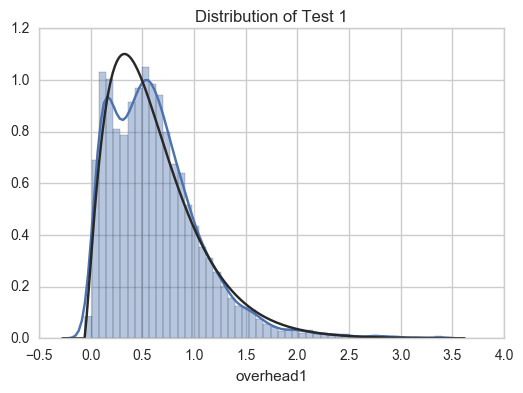

In [47]:
data = df["overhead1"]
ax = plt.axes()
sns.distplot(np.log(data), fit=stats.gamma , ax=ax)
title = "Distribution of Test 1"
ax.set_title(title)
plt.savefig(title+'.png')

Here we have plotted Q-Q (Quantile-Quantile) plot of the fitted distribution and observed data.
Baically, If the values lie along a line the distribution has the same shape (up to location and scale) as the theoretical distribution we have supposed. When looking at residuals on the y-axis and (approximate) expected quantiles on the x-axis, we can identify from how the values in some section of the plot differ locally from an overall linear trend by seeing whether the values are more or less concentrated than the theoretical distribution would suppose in that section of a plot:

<img src="https://i.stack.imgur.com/rmVTk.png" alt="Q-Qplot" style="width: 400px;"/>

As we see, less concentrated points increase more and more concentrated points than supposed increase less rapidly than an overall linear relation would suggest, and in the extreme cases correspond to a gap in the density of the sample (shows as a near-vertical jump) or a spike of constant values (values aligned horizontally). This allows us to spot a heavy tail or a light tail and hence, skewness greater or smaller than the theoretical distribution, heavier tails, and so on.



For more information see [this](http://data.library.virginia.edu/understanding-q-q-plots/)

2.91593202303 -0.0866541961484 0.247645688069


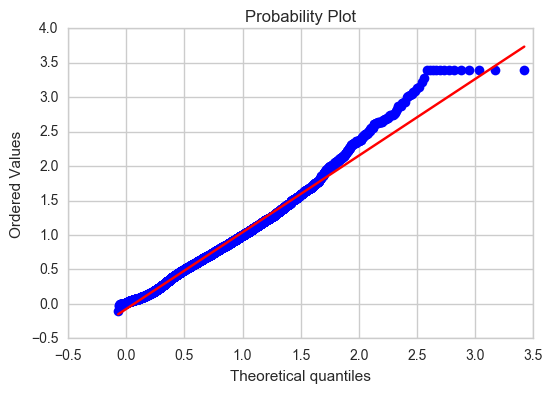

In [86]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log(data))
print fit_alpha, fit_loc, fit_beta
column_to_test = "overhead1"
stats.probplot(np.log(df[column_to_test]), dist=stats.gamma,sparams=(fit_alpha, fit_loc, fit_beta), plot=plt)
plt.savefig('Q-Qplot for '+column_to_test)

#### TODO: Gamma Mixture Model

In [117]:

#y1 =0.9038542 * stats.gamma.pdf(x, a=1.767443, loc=5.609953)
x = np.linspace(0 ,4, 1000)
y1 =stats.gamma.pdf(x, a=1.767443, scale=5.609953)
y2 = stats.gamma.pdf(x, a=0.5656199, scale=3.7370477)


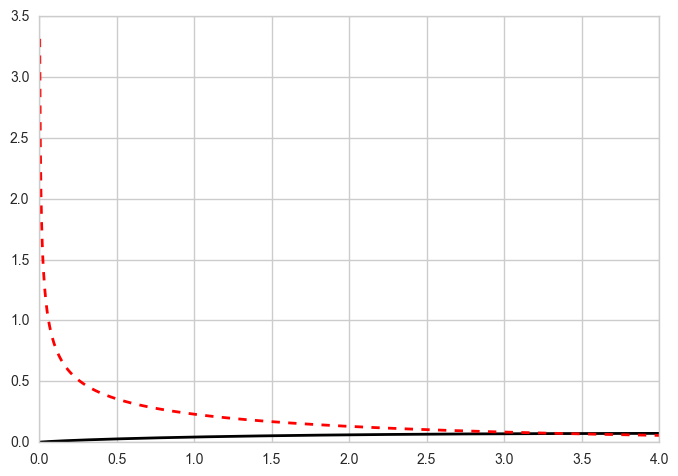

In [118]:
plt.plot(x, y1, 'k-', lw=2)
plt.plot(x, y2, 'r--', lw=2)
plt.show()

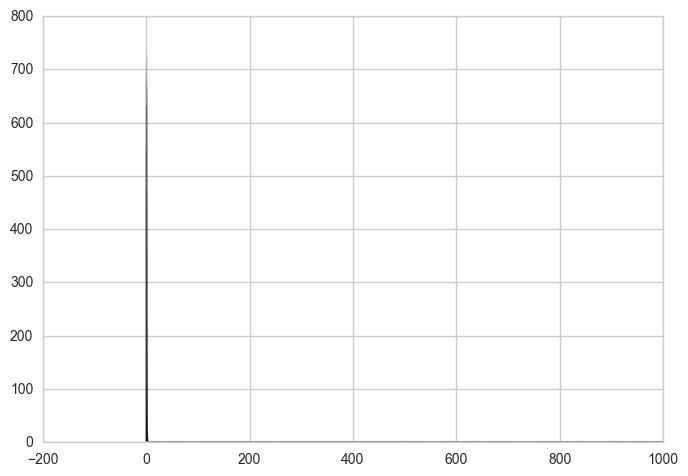

In [87]:

plt.hist(np.log(data), bins=50, alpha=0.3)
plt.plot(y1)
plt.show()


In [94]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log(data))

In [95]:
fit_alpha , fit_loc, fit_beta

(2.2892881279136379, -0.060248176854630658, 0.29947599982703488)

It is clear to say that data is not normally distributed since it is only positive and really skewed 

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0.9721357 ,   0.98107909,   0.98210666, ...,  30.        ,
          30.        ,  30.        ])),
 (1.1847096874463563, 2.131390998235827, 0.65865765416366429))

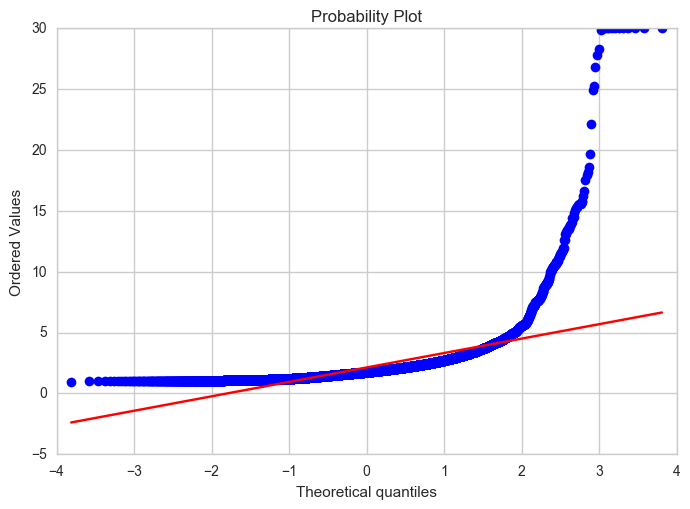

In [10]:
stats.probplot(df["overhead2"], dist="norm", plot=plt)

### the Kolmogorov–Smirnov test (K–S test) 

In this part, I looked the similarity between experiments by using Kolmogorov-Smirnov statistics. Then I plotted p-values of the test to see how similar are they. To understand these one should understand why K-S test and what it is good for. In following I tried to give basic informations about Kolmogorov-Smirnov statistics. 

In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). 

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In each case, the distributions considered under the null hypothesis are continuous distributions but are otherwise unrestricted.

The two-sample K–S test is one of the most useful and general nonparametric methods for comparing two samples, as it is sensitive to differences in both location and shape of the empirical cumulative distribution functions of the two samples.

`In following Figure, the Kolmogorov–Smirnov statistic is illustrated. Red line is Cumulative Distribution Function (CDF), blue line is an Empirical Cumulative Distribution Function (ECDF), and the black arrow is the K–S statistic.`

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/KS_Example.png" alt="K-S" style="width: 400px;"/>




In [36]:
p_values_ttest = []
p_values_ks = []
for c1, c2  in itertools.combinations(df.columns.values,2):
    x1 = np.asarray(np.log(df[c1]))
    x2 = np.asarray(np.log(df[c2]))
    p_value_ks = stats.ks_2samp(x1, x2)[1]
    p_value_ttest = stats.ttest_ind(x1,x2)[1]
    p_values_ttest.append( p_value_ttest)
    p_values_ks.append( p_value_ks)
    print "Ttest between ", c1, 'and', c2 ,':',p_value_ttest
    #print "KLD between ", c1, 'and', c2 ,':',p_value_ks
    #print "Variance of", c1, ": ",np.var(x1),"--" ,c2 ,": ", np.var(x2)
    #print "Mean of    ", c1, ": ",np.mean(x1),"--" ,c2 ,": ", np.mean(x2)


Ttest between  overhead1 and overhead2 : 9.47609794823e-05
Ttest between  overhead1 and overhead3 : 5.79878954067e-13
Ttest between  overhead1 and overhead4 : 3.08897632073e-21
Ttest between  overhead1 and overhead5 : 6.34135955215e-17
Ttest between  overhead1 and overhead6 : 1.01278255985e-18
Ttest between  overhead1 and overhead7 : 3.05840814764e-15
Ttest between  overhead1 and overhead8 : 9.44306942077e-14
Ttest between  overhead1 and overhead9 : 1.68967930039e-10
Ttest between  overhead1 and overhead10 : 2.41877335323e-14
Ttest between  overhead1 and overhead11 : 4.11414068218e-11
Ttest between  overhead1 and overhead12 : 2.77493453047e-16
Ttest between  overhead1 and overhead13 : 4.46490752231e-26
Ttest between  overhead1 and overhead14 : 2.92184725608e-15
Ttest between  overhead1 and overhead15 : 2.89845947288e-34
Ttest between  overhead1 and overhead16 : 1.52143278104e-22
Ttest between  overhead1 and overhead17 : 1.7451366251e-34
Ttest between  overhead1 and overhead18 : 3.12384

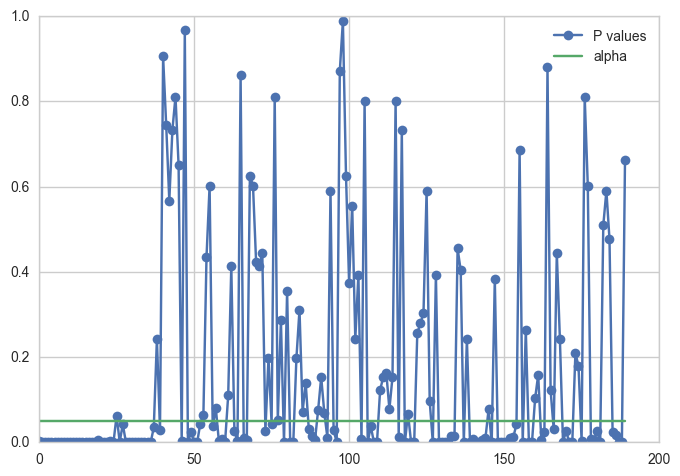

In [37]:
fig,ax = plt.subplots()
p_values = ax.plot(p_values_ks,label='P values', marker='o')
alpha = ax.plot([0.05]*len(p_values_ks), label='alpha')
legend = ax.legend(loc='upper right')

plt.show()


### Sample Size and Similarity Test 


In [8]:
z = df["overhead1"]
result = []
sample_sizes = np.arange(50,length,10)
for samp_size in sample_sizes:
    x = df["overhead1"].sample(samp_size, replace = False)
    p_value = stats.ks_2samp(x, z)[1]
    result.append(p_value)

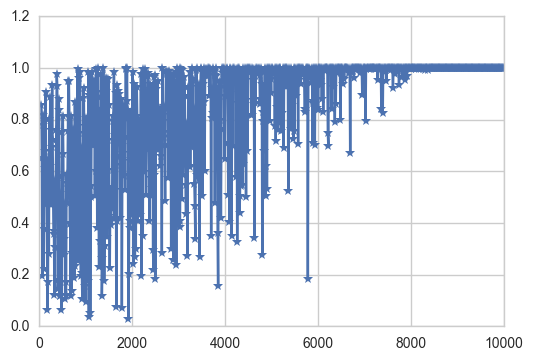

In [9]:
plt.plot(sample_sizes, result, "-*")

Here we can see that if we want to have a confidence level over 90%, we need to set sample size around <b>6000<b>

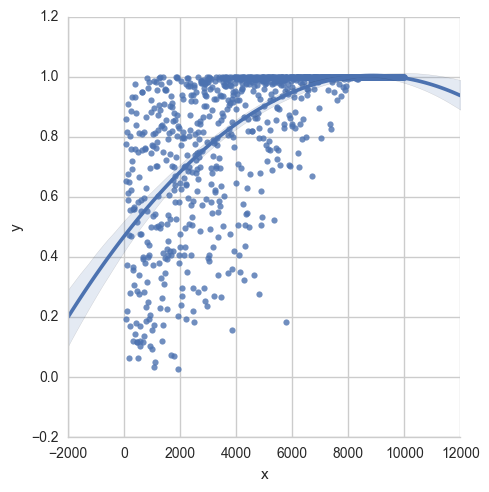

In [10]:
new_df = pd.DataFrame()
new_df["x"] = sample_sizes
new_df["y"] = result
title = 'p values between data with sample size and whole data '
ax = sns.lmplot(x ="x", y = "y", data= new_df, order=2)
plt.savefig(title+'.png')

### Power of Test and Samle Size
The probability of not committing a Type II error is called the power of a hypothesis test. In onother words, The power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis (H0) when the alternative hypothesis (H1) is true. It can be equivalently thought of as the probability of accepting the alternative hypothesis (H1) when it is true—that is, the ability of a test to detect an effect, if the effect actually exists. That is,

${\displaystyle {\text{power}}=\mathbb {P} {\big (}{\text{reject}}H_{0}{\big |}H_{1}{\text{ is true}}{\big )}}$

#### Effect Size
To compute the power of the test, one offers an alternative view about the "true" value of the population parameter, assuming that the null hypothesis is false. The effect size is the difference between the true value and the value specified in the null hypothesis.

Effect size = True value - Hypothesized value

For example, suppose the null hypothesis states that a population mean is equal to 100. A researcher might ask: What is the probability of rejecting the null hypothesis if the true population mean is equal to 90? In this example, the effect size would be 90 - 100, which equals -10.

#### Factors That Affect Power
The power of a hypothesis test is affected by three factors.

Sample size (n). Other things being equal, the greater the sample size, the greater the power of the test.

Significance level (α). The higher the significance level, the higher the power of the test. If you increase the significance level, you reduce the region of acceptance. As a result, you are more likely to reject the null hypothesis. This means you are less likely to accept the null hypothesis when it is false; i.e., less likely to make a Type II error. Hence, the power of the test is increased.

The "true" value of the parameter being tested. The greater the difference between the "true" value of a parameter and the value specified in the null hypothesis, the greater the power of the test. That is, the greater the effect size, the greater the power of the test.

#### Why is it important?
Although you can conduct a hypothesis test without it, calculating the power of a test beforehand will help
you ensure that the sample size is large enough for the purpose of the test. Otherwise, the test may be
inconclusive, leading to wasted resources. On rare occasions the power may be calculated after the test is
performed, but this is not recommended except to determine an adequate sample size for a follow-up study
(if a test failed to detect an effect, it was obviously underpowered – nothing new can be learned by
calculating the power at this stage).

#### How is it calculated?
As an example, consider testing whether the average time per week spent watching TV is 4 hours versus the
alternative that it is greater than 4 hours. We will calculate the power of the test for a specific value under the
alternative hypothesis, say, 7 hours:

The Null Hypothesis is H0:  $\mu_{1}$ = 4 hours

The Alternative Hypothesis is H1:  $\mu$ = 6 hours

Where  $\mu$ = the average time per week spent watching TV. Under the null hypothesis μ is written as μ0 and
under the alternative it is written as μ1. So here  $\mu_{0}$ = 4 and  $\mu_{1}$ = 6. Suppose the standard deviation from past
data is known to be 2 hours. To find the power of this test for a sample size of 4:

   1.At the 5% significance level, the decision criterion for the test is to reject H0 if Z > 1.645, where 
${\displaystyle {\bar{Z} = \dfrac{\bar{X}- \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}} = \dfrac{\bar{X} - 4}{\dfrac{2}{\sqrt{4}}} = \bar{X} - 4}}$

The 5% critical value from the standard normal distribution is 1.645. Equating the critical Z-value to
the calculated Z gives the corresponding (hypothetical) sample mean value:

${\displaystyle{1.645 = \bar{X} - 4 \rightarrow \bar{X} = 5.645}}$

   2.Calculate the Z-statistic assuming the alternative hypothesis is true, i.e., ${\displaystyle{\mu_{1}}}$ = 6:

${\displaystyle {\bar{Z} = \dfrac{\bar{X}- \mu_{1}}{\dfrac{\sigma}{\sqrt{n}}} = \dfrac{5.645 - 6}{\dfrac{2}{\sqrt{4}}} = -0.355}}$

   3.P(Z > -0.355) = 0.6387. The power of the test is approximately 64%. In general, tests with 80% power and higher are considered to be statistically powerful. 

<b>To find the sample size required to achieve a target power, work backwards from the power. </b>

#### What factors affect the power of a test?
To increase the power of your test, you may do any of the following:
    1. Increase the effect size (the difference between the null and alternative values) to be detected
    2. Increase the sample size(s)
    3. Decrease the variability in the sample(s)
    4. Increase the significance level (alpha) of the test 

#### Sample Size  Calculation with respect to $\alpha$ : significance level and 1-$\beta$: power of the test 

In [60]:
data1 = df["overhead1"]
data2 = df["overhead4"]
var1 =np.var(data1)
var2 =np.var(data2)
mean1 = np.mean(data1)
mean2 = np.mean(data2)
sens1 = var1/8
print sens1
16*4*var1*var1 / (sens1 * sens1)


0.364373410987


4096.0

In [61]:
effect_size = np.abs(mean1 - mean2)
print "Effect size :",effect_size
print "Sample Size for T-Test with given parameters : ", power.tt_ind_solve_power(effect_size = effect_size, alpha =0.01, power=0.9)

Effect size : 0.159619204507
Sample Size for T-Test with given parameters :  1169.66513805


#### Gamma Mixture Model

This implementation seems to fails for `overhead` data !!!!

In [62]:
import scipy.special
from scipy.misc import logsumexp
 
def invpsi(y):
    """
    Inverse digamma (psi) function.  The digamma function is the
    derivative of the log gamma function.
    """
 
    # Newton iteration to solve digamma(x)-y = 0
    x = np.exp(y) + 0.5
    mask = y < -2.22
    x[mask] = 1.0 / (y[mask] - scipy.special.psi(1))
 
    # never more than 5 iterations required
    for i in range(5):
        x = x - (scipy.special.psi(x)-y) / scipy.special.polygamma(1, x)
    return x


def fit(x, k=3):
    alpha = 10*np.random.rand(k)
    rate = 10*np.random.rand(k)
    pi = np.ones(k)
    log_x = np.log(x)
 
    for i in range(50):
        # log probability of each data point in each component
        logg = alpha*np.log(rate) - scipy.special.gammaln(alpha) + \
            np.multiply.outer(log_x, alpha-1) - np.multiply.outer(x, rate)
        logp = np.log(pi) + logg - logsumexp(logg, axis=1, b=pi[np.newaxis])[:, np.newaxis]
        p = np.exp(logp)

        # new mixing weights
        pi = np.mean(np.exp(logp), axis=0)

        # new rate and scale parameters
        A = np.einsum('i,ij->j', log_x, p)
        B = np.einsum('j,ij->j', np.log(rate), p)
        alpha_argument = (A + B) / np.sum(p, axis=0)
        rate = alpha*np.sum(p, axis=0) / np.einsum('i,ij->j', x, p)
        # when the fit is bad (early iterations), this conditional maximum
        # likelihood update step is not guarenteed to keep alpha positive,
        # which causes the next iteration to be NAN values.
        alpha = np.maximum(invpsi(alpha_argument), 1e-8)


    x = np.linspace(0.001, np.max(x), 1000)
    g = (np.power(rate, alpha)/scipy.special.gamma(alpha)) * np.power.outer(x, alpha-1) *  np.exp(-np.multiply.outer(x, rate))
    ax2 = plt.gca().twinx()
    ax2.plot(x, g[:, 0])
    ax2.plot(x, g[:, 1])
    print alpha
    return (alpha, rate, pi)


[ 8.03941105  6.01289022]


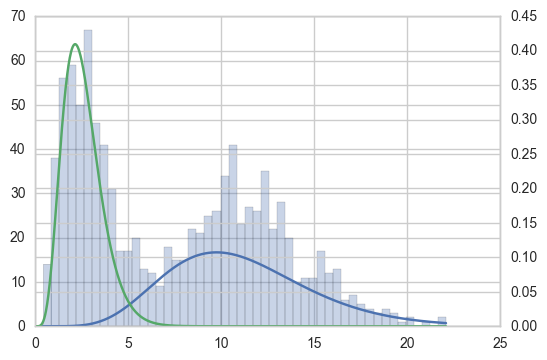

In [113]:
x = np.concatenate((scipy.stats.distributions.gamma(9,3).rvs(500),
                    scipy.stats.distributions.gamma(3,0.2).rvs(500)))
plt.hist(x, bins=50, alpha=0.3)
(alpha, rate, pi) = fit(x, k=2)
plt.show()

alpha is the shape parameter, rate is $\beta$, scale is $1/\beta$

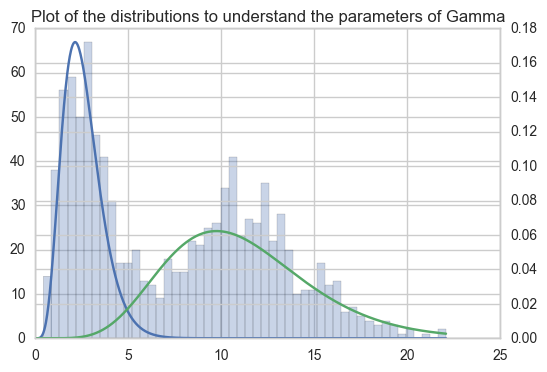

In [116]:

t = np.linspace(0.001, np.max(x), 1000)
plt.hist(x, bins=50, alpha=0.3)
ax2 = plt.gca().twinx()
ax2.plot(t, stats.gamma.pdf(t, a = alpha[1], scale = 1/rate[1] )*pi[1])
ax2.plot(t, stats.gamma.pdf(t, a = alpha[0], scale = 1/rate[0] )*pi[0])
plt.title('Plot of the distributions to understand the parameters of Gamma')
plt.show()

### Fitting Gamma Mixture Model by Matlab API 

In [132]:
import matlab.engine as meng
import matlab
eng = meng.start_matlab()
eng.cd(r'../../GMMestimator/')
log_data = np.log(data)

In [136]:
n_components_gamma = 3
prob, alpha_gamma, scale_gamma = eng.GMMestimator(matlab.double(log_data.tolist()),n_components_gamma,500,0.00001,1, nargout=3)

prob = np.asarray(prob); 
alpha_gamma = np.asarray(alpha_gamma);
scale_gamma = np.asarray(scale_gamma);

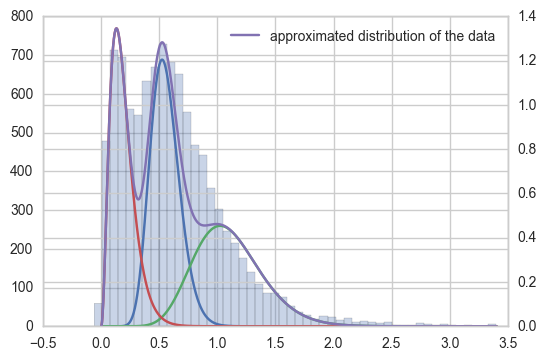

In [137]:
t = np.linspace(0.001, np.max(log_data), 1000)
plt.hist(log_data, bins=50, alpha=0.3)
ax2 = plt.gca().twinx()




total = (stats.gamma.pdf(t, a = alpha_gamma[0][0], scale = scale_gamma[0][0] )* prob[0][0])
ax2.plot(t, total)
for i in range(1,alpha_gamma[0].shape[0]):
    total += (stats.gamma.pdf(t, a = alpha_gamma[0][i], scale = scale_gamma[0][i] )* prob[0][i])
    ax2.plot(t, (stats.gamma.pdf(t, a = alpha_gamma[0][i], scale = scale_gamma[0][i] )* prob[0][i]))
ax2.plot(t,total, label = 'approximated distribution of the data')
ax2.legend()
plt.show()

###  Gaussian Mixture Model

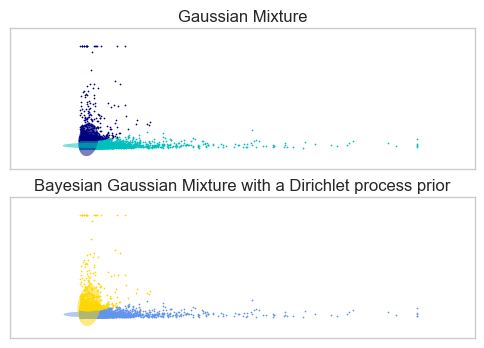

In [54]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)



X = df[['overhead1', 'overhead2']].values

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=2,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()


In [125]:
import matplotlib.mlab as mlab
import math

n_components = 3
data = df[['overhead1']].values
x = np.log(data)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full').fit(x)
dpgmm = mixture.BayesianGaussianMixture(n_components=n_components,covariance_type='full').fit(x)

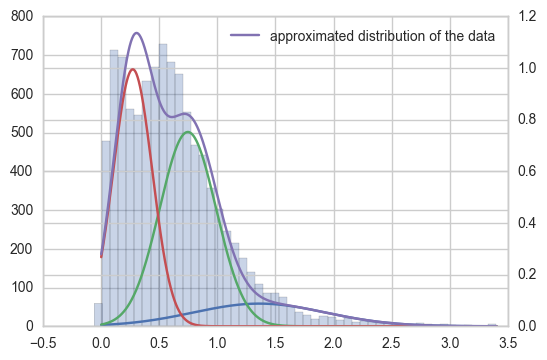

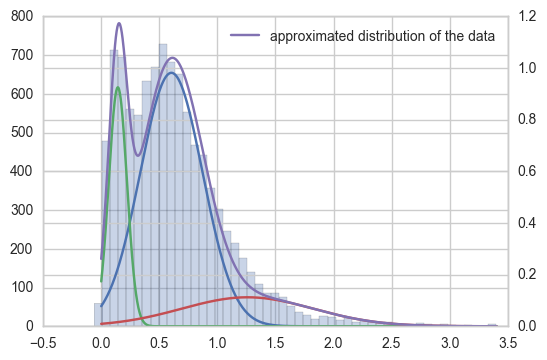

In [131]:
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
weights = gmm.weights_

t = np.linspace(0.001, np.max(x), 1000)
# plot gaussian mixture model
plt.hist(x, bins=50, alpha=0.3)
ax2 = plt.gca().twinx()

total = (mlab.normpdf(t, mu[0], sigma[0])*weights[0]).reshape(t.shape[0],1)
ax2.plot(t, total)
for i in range(1,mu.shape[0]):
    total += (mlab.normpdf(t, mu[i], sigma[i])*weights[i]).reshape(t.shape[0],1)
    ax2.plot(t, (mlab.normpdf(t, mu[i], sigma[i])*weights[i]).reshape(t.shape[0],1))
ax2.plot(t,total, label = 'approximated distribution of the data')
ax2.legend()
plt.show()


# plot Bayesian Gaussian Mixture with a Dirichlet
plt.hist(x, bins=50, alpha=0.3)
ax2 = plt.gca().twinx()
mu = dpgmm.means_
variance = dpgmm.covariances_
sigma = np.sqrt(variance)
weights = dpgmm.weights_

total = (mlab.normpdf(t, mu[0], sigma[0])*weights[0]).reshape(t.shape[0],1)
ax2.plot(t, total)
for i in range(1,mu.shape[0]):
    total += (mlab.normpdf(t, mu[i], sigma[i])*weights[i]).reshape(t.shape[0],1)
    ax2.plot(t, (mlab.normpdf(t, mu[i], sigma[i])*weights[i]).reshape(t.shape[0],1))
ax2.plot(t,total, label = 'approximated distribution of the data')
ax2.legend()
plt.show()